In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# Load data dan preprocsessing

data = pd.read_csv('archive/daily/AALI.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [ ]:
# split dataset

train_size = int(len(data) * 0.8)
data_train, data_test = data[:train_size], data[train_size:]

In [ ]:
# normalisasi data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_train = scaler.fit_transform(data_train)
scaled_data_test = scaler.transform(data_test)

In [ ]:
# buat input sequence untuk ANN input

def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length].flatten())
        targets.append(data[i + seq_length, 3])
    return np.array(sequences), np.array(targets)

seq_length = 60
X_train, y_train = create_sequences(scaled_data_train, seq_length)
X_test, y_test = create_sequences(scaled_data_test, seq_length)

In [ ]:
# split data menjadi validation data dan train data

train_val_split = int(len(X_train) * 0.8)
X_train_final, X_val = X_train[:train_val_split], X_train[train_val_split:]
y_train_final, y_val = y_train[:train_val_split], y_train[train_val_split:]

In [ ]:
# membuat model dan compile model

model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_final.shape[1],)),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

f:\KULIAH\SEM 4\MachineLearning\FinalProject\myvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,201 (137.50 KB)

 Trainable params: 35,201 (137.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training model

history = model.fit(X_train_final, y_train_final, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0389 - val_loss: 0.0117
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0056
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 - val_loss: 0.0019
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - val_loss: 0.0079
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0062
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0109
Epoch 9/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - val_loss: 0.0064
Epoch 10/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - val_loss: 0.0024


In [ ]:
# predict model

train_predictions = model.predict(X_train_final).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
# menghitung metrics 

mse_train_norm = mean_squared_error(y_train_final, train_predictions)
mape_train_norm = mean_absolute_percentage_error(y_train_final, train_predictions)
r2_train_norm = r2_score(y_train_final, train_predictions)

mse_val_norm = mean_squared_error(y_val, val_predictions)
mape_val_norm = mean_absolute_percentage_error(y_val, val_predictions)
r2_val_norm = r2_score(y_val, val_predictions)

mse_test_norm = mean_squared_error(y_test, test_predictions)
mape_test_norm = mean_absolute_percentage_error(y_test, test_predictions)
r2_test_norm = r2_score(y_test, test_predictions)

print(f'MSE (Train, Normalized): {mse_train_norm:.4f}, MAPE (Train, Normalized): {mape_train_norm:.4f}, R² (Train, Normalized): {r2_train_norm:.4f}')
print(f'MSE (Validation, Normalized): {mse_val_norm:.4f}, MAPE (Validation, Normalized): {mape_val_norm:.4f}, R² (Validation, Normalized): {r2_val_norm:.4f}')
print(f'MSE (Test, Normalized): {mse_test_norm:.4f}, MAPE (Test, Normalized): {mape_test_norm:.4f}, R² (Test, Normalized): {r2_test_norm:.4f}')

MSE (Train, Normalized): 0.0040, MAPE (Train, Normalized): 0.1393, R² (Train, Normalized): 0.9497
MSE (Validation, Normalized): 0.0024, MAPE (Validation, Normalized): 0.0765, R² (Validation, Normalized): 0.7066
MSE (Test, Normalized): 0.0007, MAPE (Test, Normalized): 0.0714, R² (Test, Normalized): 0.8046


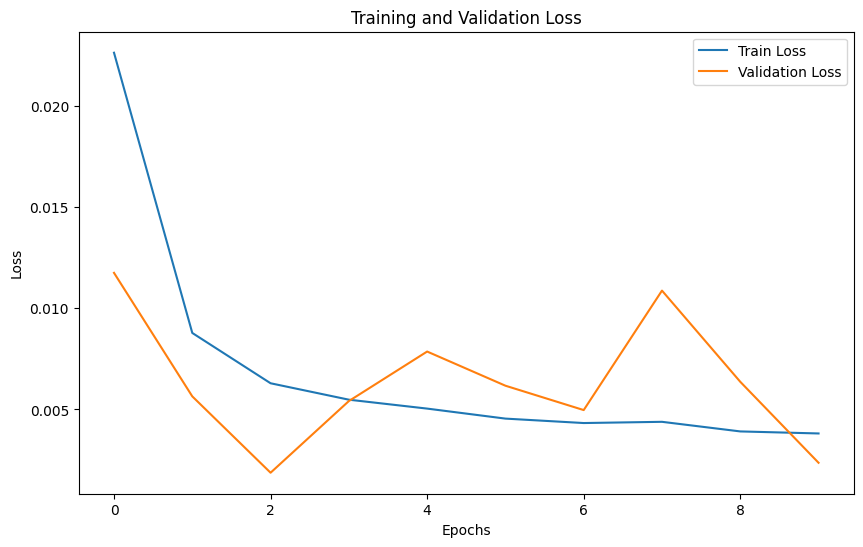

In [ ]:
# plot validation data

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

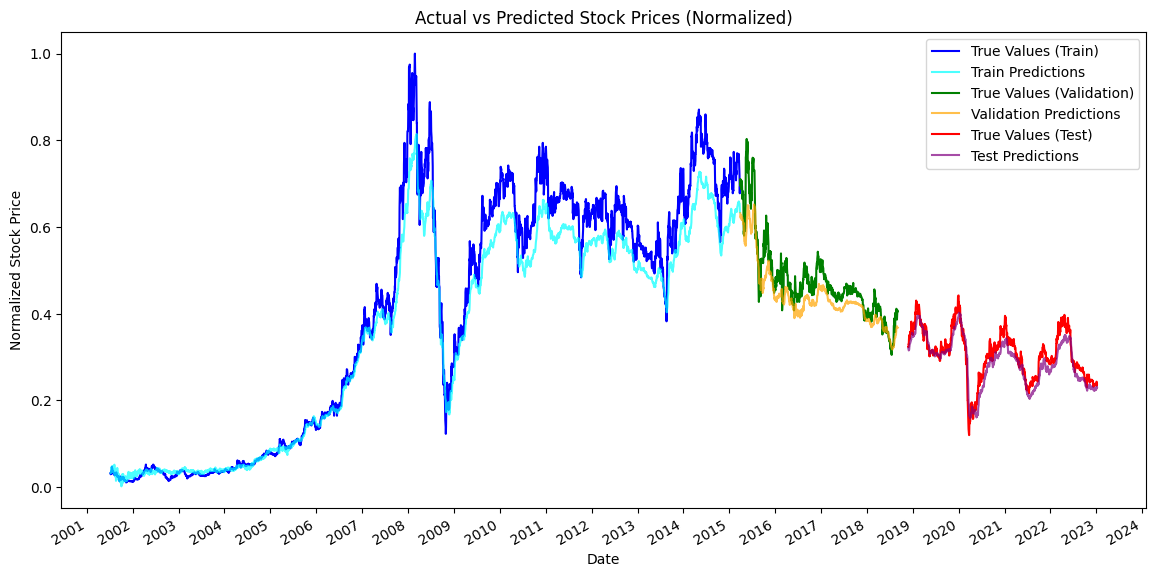

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))

train_dates = data.index[seq_length:train_val_split + seq_length]
val_dates = data.index[train_val_split + seq_length:train_val_split + seq_length + len(val_predictions)]
test_dates = data.index[train_size + seq_length:train_size + seq_length + len(test_predictions)]

plt.plot(train_dates, y_train_final, label='True Values (Train)', color='blue')
plt.plot(train_dates, train_predictions, label='Train Predictions', color='cyan', alpha=0.7)

plt.plot(val_dates, y_val, label='True Values (Validation)', color='green')
plt.plot(val_dates, val_predictions, label='Validation Predictions', color='orange', alpha=0.7)

plt.plot(test_dates, y_test, label='True Values (Test)', color='red')
plt.plot(test_dates, test_predictions, label='Test Predictions', color='purple', alpha=0.7)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Normalized Stock Price')
plt.legend()
plt.title('Actual vs Predicted Stock Prices (Normalized)')
plt.show()